In [76]:
# Imports
import os
import cv2
import dlib
import imutils
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from IPython.display import display
from tqdm import tqdm
from imutils import face_utils
import matplotlib.pyplot as plt
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from time import sleep
from math import sqrt
import pickle

# from google.colab import drive
# drive.mount('/content/drive')

CARGAR DATOS DEL TRAIN

In [2]:
def generate_data_as_landmarks(video_path, person_name):

    # Cargar video
    cap = cv2.VideoCapture(video_path)

    # Cargar el modelo de reconocimiento de landmarks
    # p = "drive/MyDrive/models/shape_predictor_68_face_landmarks.dat"
    p = "models/shape_predictor_68_face_landmarks.dat"
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(p)

    # Obtener primer frame
    success, frame = cap.read()

    # Almacenar caras
    data = []

    # Por cada frame del video
    while success:

        # Preprocesar frame y obtener caras detectadas
        frame = imutils.resize(frame, width=640)

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        rects = detector(gray, 0)

        for (i, rect) in enumerate(rects):

            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)

            data.append(generate_dist_from_frame(shape, frame) + [person_name])

        # Obtener siguiente frame
        success, frame = cap.read()

    cap.release()

    return data

In [3]:
lista = []
for i in range(0,68):
    for j in range(i+1,68):
        lista.append(f'{i}TO{j}')
print(lista)

['0TO1', '0TO2', '0TO3', '0TO4', '0TO5', '0TO6', '0TO7', '0TO8', '0TO9', '0TO10', '0TO11', '0TO12', '0TO13', '0TO14', '0TO15', '0TO16', '0TO17', '0TO18', '0TO19', '0TO20', '0TO21', '0TO22', '0TO23', '0TO24', '0TO25', '0TO26', '0TO27', '0TO28', '0TO29', '0TO30', '0TO31', '0TO32', '0TO33', '0TO34', '0TO35', '0TO36', '0TO37', '0TO38', '0TO39', '0TO40', '0TO41', '0TO42', '0TO43', '0TO44', '0TO45', '0TO46', '0TO47', '0TO48', '0TO49', '0TO50', '0TO51', '0TO52', '0TO53', '0TO54', '0TO55', '0TO56', '0TO57', '0TO58', '0TO59', '0TO60', '0TO61', '0TO62', '0TO63', '0TO64', '0TO65', '0TO66', '0TO67', '1TO2', '1TO3', '1TO4', '1TO5', '1TO6', '1TO7', '1TO8', '1TO9', '1TO10', '1TO11', '1TO12', '1TO13', '1TO14', '1TO15', '1TO16', '1TO17', '1TO18', '1TO19', '1TO20', '1TO21', '1TO22', '1TO23', '1TO24', '1TO25', '1TO26', '1TO27', '1TO28', '1TO29', '1TO30', '1TO31', '1TO32', '1TO33', '1TO34', '1TO35', '1TO36', '1TO37', '1TO38', '1TO39', '1TO40', '1TO41', '1TO42', '1TO43', '1TO44', '1TO45', '1TO46', '1TO47',

In [4]:
# headers = [ 'right_eye', 'left_eye', 'nose_height', 'nose_width', 'right_eyebrow',
#             'left_eyebrow', 'mouth', 'chin', 'dist_chin_mouth', 'dist_mouth_nose',
#             'right_jaw', 'left_jaw', 'right_ear', 'left_ear',
#             'pixel_piel_1_B', 'pixel_piel_1_G', 'pixel_piel_1_R',
#             'pixel_piel_2_B', 'pixel_piel_2_G', 'pixel_piel_2_R',
#             'pixel_piel_3_B', 'pixel_piel_3_G', 'pixel_piel_3_R',
#             'pixel_piel_4_B', 'pixel_piel_4_G', 'pixel_piel_4_R',
#             'Etiqueta']

In [5]:
headers = ['0TO1', '0TO2', '0TO3', '0TO4', '0TO5', '0TO6', '0TO7', '0TO8', '0TO9', '0TO10', '0TO11', '0TO12', '0TO13', '0TO14', '0TO15', '0TO16', '0TO17', '0TO18', '0TO19', '0TO20', '0TO21', '0TO22', '0TO23', '0TO24', '0TO25', '0TO26', '0TO27', '0TO28', '0TO29', '0TO30', '0TO31', '0TO32', '0TO33', '0TO34', '0TO35', '0TO36', '0TO37', '0TO38', '0TO39', '0TO40', '0TO41', '0TO42', '0TO43', '0TO44', '0TO45', '0TO46', '0TO47', '0TO48', '0TO49', '0TO50', '0TO51', '0TO52', '0TO53', '0TO54', '0TO55', '0TO56', '0TO57', '0TO58', '0TO59', '0TO60', '0TO61', '0TO62', '0TO63', '0TO64', '0TO65', '0TO66', '0TO67', '1TO2', '1TO3', '1TO4', '1TO5', '1TO6', '1TO7', '1TO8', '1TO9', '1TO10', '1TO11', '1TO12', '1TO13', '1TO14', '1TO15', '1TO16', '1TO17', '1TO18', '1TO19', '1TO20', '1TO21', '1TO22', '1TO23', '1TO24', '1TO25', '1TO26', '1TO27', '1TO28', '1TO29', '1TO30', '1TO31', '1TO32', '1TO33', '1TO34', '1TO35', '1TO36', '1TO37', '1TO38', '1TO39', '1TO40', '1TO41', '1TO42', '1TO43', '1TO44', '1TO45', '1TO46', '1TO47', '1TO48', '1TO49', '1TO50', '1TO51', '1TO52', '1TO53', '1TO54', '1TO55', '1TO56', '1TO57', '1TO58', '1TO59', '1TO60', '1TO61', '1TO62', '1TO63', '1TO64', '1TO65', '1TO66', '1TO67', '2TO3', '2TO4', '2TO5', '2TO6', '2TO7', '2TO8', '2TO9', '2TO10', '2TO11', '2TO12', '2TO13', '2TO14', '2TO15', '2TO16', '2TO17', '2TO18', '2TO19', '2TO20', '2TO21', '2TO22', '2TO23', '2TO24', '2TO25', '2TO26', '2TO27', '2TO28', '2TO29', '2TO30', '2TO31', '2TO32', '2TO33', '2TO34', '2TO35', '2TO36', '2TO37', '2TO38', '2TO39', '2TO40', '2TO41', '2TO42', '2TO43', '2TO44', '2TO45', '2TO46', '2TO47', '2TO48', '2TO49', '2TO50', '2TO51', '2TO52', '2TO53', '2TO54', '2TO55', '2TO56', '2TO57', '2TO58', '2TO59', '2TO60', '2TO61', '2TO62', '2TO63', '2TO64', '2TO65', '2TO66', '2TO67', '3TO4', '3TO5', '3TO6', '3TO7', '3TO8', '3TO9', '3TO10', '3TO11', '3TO12', '3TO13', '3TO14', '3TO15', '3TO16', '3TO17', '3TO18', '3TO19', '3TO20', '3TO21', '3TO22', '3TO23', '3TO24', '3TO25', '3TO26', '3TO27', '3TO28', '3TO29', '3TO30', '3TO31', '3TO32', '3TO33', '3TO34', '3TO35', '3TO36', '3TO37', '3TO38', '3TO39', '3TO40', '3TO41', '3TO42', '3TO43', '3TO44', '3TO45', '3TO46', '3TO47', '3TO48', '3TO49', '3TO50', '3TO51', '3TO52', '3TO53', '3TO54', '3TO55', '3TO56', '3TO57', '3TO58', '3TO59', '3TO60', '3TO61', '3TO62', '3TO63', '3TO64', '3TO65', '3TO66', '3TO67', '4TO5', '4TO6', '4TO7', '4TO8', '4TO9', '4TO10', '4TO11', '4TO12', '4TO13', '4TO14', '4TO15', '4TO16', '4TO17', '4TO18', '4TO19', '4TO20', '4TO21', '4TO22', '4TO23', '4TO24', '4TO25', '4TO26', '4TO27', '4TO28', '4TO29', '4TO30', '4TO31', '4TO32', '4TO33', '4TO34', '4TO35', '4TO36', '4TO37', '4TO38', '4TO39', '4TO40', '4TO41', '4TO42', '4TO43', '4TO44', '4TO45', '4TO46', '4TO47', '4TO48', '4TO49', '4TO50', '4TO51', '4TO52', '4TO53', '4TO54', '4TO55', '4TO56', '4TO57', '4TO58', '4TO59', '4TO60', '4TO61', '4TO62', '4TO63', '4TO64', '4TO65', '4TO66', '4TO67', '5TO6', '5TO7', '5TO8', '5TO9', '5TO10', '5TO11', '5TO12', '5TO13', '5TO14', '5TO15', '5TO16', '5TO17', '5TO18', '5TO19', '5TO20', '5TO21', '5TO22', '5TO23', '5TO24', '5TO25', '5TO26', '5TO27', '5TO28', '5TO29', '5TO30', '5TO31', '5TO32', '5TO33', '5TO34', '5TO35', '5TO36', '5TO37', '5TO38', '5TO39', '5TO40', '5TO41', '5TO42', '5TO43', '5TO44', '5TO45', '5TO46', '5TO47', '5TO48', '5TO49', '5TO50', '5TO51', '5TO52', '5TO53', '5TO54', '5TO55', '5TO56', '5TO57', '5TO58', '5TO59', '5TO60', '5TO61', '5TO62', '5TO63', '5TO64', '5TO65', '5TO66', '5TO67', '6TO7', '6TO8', '6TO9', '6TO10', '6TO11', '6TO12', '6TO13', '6TO14', '6TO15', '6TO16', '6TO17', '6TO18', '6TO19', '6TO20', '6TO21', '6TO22', '6TO23', '6TO24', '6TO25', '6TO26', '6TO27', '6TO28', '6TO29', '6TO30', '6TO31', '6TO32', '6TO33', '6TO34', '6TO35', '6TO36', '6TO37', '6TO38', '6TO39', '6TO40', '6TO41', '6TO42', '6TO43', '6TO44', '6TO45', '6TO46', '6TO47', '6TO48', '6TO49', '6TO50', '6TO51', '6TO52', '6TO53', '6TO54', '6TO55', '6TO56', '6TO57', '6TO58', '6TO59', '6TO60', '6TO61', '6TO62', '6TO63', '6TO64', '6TO65', '6TO66', '6TO67', '7TO8', '7TO9', '7TO10', '7TO11', '7TO12', '7TO13', '7TO14', '7TO15', '7TO16', '7TO17', '7TO18', '7TO19', '7TO20', '7TO21', '7TO22', '7TO23', '7TO24', '7TO25', '7TO26', '7TO27', '7TO28', '7TO29', '7TO30', '7TO31', '7TO32', '7TO33', '7TO34', '7TO35', '7TO36', '7TO37', '7TO38', '7TO39', '7TO40', '7TO41', '7TO42', '7TO43', '7TO44', '7TO45', '7TO46', '7TO47', '7TO48', '7TO49', '7TO50', '7TO51', '7TO52', '7TO53', '7TO54', '7TO55', '7TO56', '7TO57', '7TO58', '7TO59', '7TO60', '7TO61', '7TO62', '7TO63', '7TO64', '7TO65', '7TO66', '7TO67', '8TO9', '8TO10', '8TO11', '8TO12', '8TO13', '8TO14', '8TO15', '8TO16', '8TO17', '8TO18', '8TO19', '8TO20', '8TO21', '8TO22', '8TO23', '8TO24', '8TO25', '8TO26', '8TO27', '8TO28', '8TO29', '8TO30', '8TO31', '8TO32', '8TO33', '8TO34', '8TO35', '8TO36', '8TO37', '8TO38', '8TO39', '8TO40', '8TO41', '8TO42', '8TO43', '8TO44', '8TO45', '8TO46', '8TO47', '8TO48', '8TO49', '8TO50', '8TO51', '8TO52', '8TO53', '8TO54', '8TO55', '8TO56', '8TO57', '8TO58', '8TO59', '8TO60', '8TO61', '8TO62', '8TO63', '8TO64', '8TO65', '8TO66', '8TO67', '9TO10', '9TO11', '9TO12', '9TO13', '9TO14', '9TO15', '9TO16', '9TO17', '9TO18', '9TO19', '9TO20', '9TO21', '9TO22', '9TO23', '9TO24', '9TO25', '9TO26', '9TO27', '9TO28', '9TO29', '9TO30', '9TO31', '9TO32', '9TO33', '9TO34', '9TO35', '9TO36', '9TO37', '9TO38', '9TO39', '9TO40', '9TO41', '9TO42', '9TO43', '9TO44', '9TO45', '9TO46', '9TO47', '9TO48', '9TO49', '9TO50', '9TO51', '9TO52', '9TO53', '9TO54', '9TO55', '9TO56', '9TO57', '9TO58', '9TO59', '9TO60', '9TO61', '9TO62', '9TO63', '9TO64', '9TO65', '9TO66', '9TO67', '10TO11', '10TO12', '10TO13', '10TO14', '10TO15', '10TO16', '10TO17', '10TO18', '10TO19', '10TO20', '10TO21', '10TO22', '10TO23', '10TO24', '10TO25', '10TO26', '10TO27', '10TO28', '10TO29', '10TO30', '10TO31', '10TO32', '10TO33', '10TO34', '10TO35', '10TO36', '10TO37', '10TO38', '10TO39', '10TO40', '10TO41', '10TO42', '10TO43', '10TO44', '10TO45', '10TO46', '10TO47', '10TO48', '10TO49', '10TO50', '10TO51', '10TO52', '10TO53', '10TO54', '10TO55', '10TO56', '10TO57', '10TO58', '10TO59', '10TO60', '10TO61', '10TO62', '10TO63', '10TO64', '10TO65', '10TO66', '10TO67', '11TO12', '11TO13', '11TO14', '11TO15', '11TO16', '11TO17', '11TO18', '11TO19', '11TO20', '11TO21', '11TO22', '11TO23', '11TO24', '11TO25', '11TO26', '11TO27', '11TO28', '11TO29', '11TO30', '11TO31', '11TO32', '11TO33', '11TO34', '11TO35', '11TO36', '11TO37', '11TO38', '11TO39', '11TO40', '11TO41', '11TO42', '11TO43', '11TO44', '11TO45', '11TO46', '11TO47', '11TO48', '11TO49', '11TO50', '11TO51', '11TO52', '11TO53', '11TO54', '11TO55', '11TO56', '11TO57', '11TO58', '11TO59', '11TO60', '11TO61', '11TO62', '11TO63', '11TO64', '11TO65', '11TO66', '11TO67', '12TO13', '12TO14', '12TO15', '12TO16', '12TO17', '12TO18', '12TO19', '12TO20', '12TO21', '12TO22', '12TO23', '12TO24', '12TO25', '12TO26', '12TO27', '12TO28', '12TO29', '12TO30', '12TO31', '12TO32', '12TO33', '12TO34', '12TO35', '12TO36', '12TO37', '12TO38', '12TO39', '12TO40', '12TO41', '12TO42', '12TO43', '12TO44', '12TO45', '12TO46', '12TO47', '12TO48', '12TO49', '12TO50', '12TO51', '12TO52', '12TO53', '12TO54', '12TO55', '12TO56', '12TO57', '12TO58', '12TO59', '12TO60', '12TO61', '12TO62', '12TO63', '12TO64', '12TO65', '12TO66', '12TO67', '13TO14', '13TO15', '13TO16', '13TO17', '13TO18', '13TO19', '13TO20', '13TO21', '13TO22', '13TO23', '13TO24', '13TO25', '13TO26', '13TO27', '13TO28', '13TO29', '13TO30', '13TO31', '13TO32', '13TO33', '13TO34', '13TO35', '13TO36', '13TO37', '13TO38', '13TO39', '13TO40', '13TO41', '13TO42', '13TO43', '13TO44', '13TO45', '13TO46', '13TO47', '13TO48', '13TO49', '13TO50', '13TO51', '13TO52', '13TO53', '13TO54', '13TO55', '13TO56', '13TO57', '13TO58', '13TO59', '13TO60', '13TO61', '13TO62', '13TO63', '13TO64', '13TO65', '13TO66', '13TO67', '14TO15', '14TO16', '14TO17', '14TO18', '14TO19', '14TO20', '14TO21', '14TO22', '14TO23', '14TO24', '14TO25', '14TO26', '14TO27', '14TO28', '14TO29', '14TO30', '14TO31', '14TO32', '14TO33', '14TO34', '14TO35', '14TO36', '14TO37', '14TO38', '14TO39', '14TO40', '14TO41', '14TO42', '14TO43', '14TO44', '14TO45', '14TO46', '14TO47', '14TO48', '14TO49', '14TO50', '14TO51', '14TO52', '14TO53', '14TO54', '14TO55', '14TO56', '14TO57', '14TO58', '14TO59', '14TO60', '14TO61', '14TO62', '14TO63', '14TO64', '14TO65', '14TO66', '14TO67', '15TO16', '15TO17', '15TO18', '15TO19', '15TO20', '15TO21', '15TO22', '15TO23', '15TO24', '15TO25', '15TO26', '15TO27', '15TO28', '15TO29', '15TO30', '15TO31', '15TO32', '15TO33', '15TO34', '15TO35', '15TO36', '15TO37', '15TO38', '15TO39', '15TO40', '15TO41', '15TO42', '15TO43', '15TO44', '15TO45', '15TO46', '15TO47', '15TO48', '15TO49', '15TO50', '15TO51', '15TO52', '15TO53', '15TO54', '15TO55', '15TO56', '15TO57', '15TO58', '15TO59', '15TO60', '15TO61', '15TO62', '15TO63', '15TO64', '15TO65', '15TO66', '15TO67', '16TO17', '16TO18', '16TO19', '16TO20', '16TO21', '16TO22', '16TO23', '16TO24', '16TO25', '16TO26', '16TO27', '16TO28', '16TO29', '16TO30', '16TO31', '16TO32', '16TO33', '16TO34', '16TO35', '16TO36', '16TO37', '16TO38', '16TO39', '16TO40', '16TO41', '16TO42', '16TO43', '16TO44', '16TO45', '16TO46', '16TO47', '16TO48', '16TO49', '16TO50', '16TO51', '16TO52', '16TO53', '16TO54', '16TO55', '16TO56', '16TO57', '16TO58', '16TO59', '16TO60', '16TO61', '16TO62', '16TO63', '16TO64', '16TO65', '16TO66', '16TO67', '17TO18', '17TO19', '17TO20', '17TO21', '17TO22', '17TO23', '17TO24', '17TO25', '17TO26', '17TO27', '17TO28', '17TO29', '17TO30', '17TO31', '17TO32', '17TO33', '17TO34', '17TO35', '17TO36', '17TO37', '17TO38', '17TO39', '17TO40', '17TO41', '17TO42', '17TO43', '17TO44', '17TO45', '17TO46', '17TO47', '17TO48', '17TO49', '17TO50', '17TO51', '17TO52', '17TO53', '17TO54', '17TO55', '17TO56', '17TO57', '17TO58', '17TO59', '17TO60', '17TO61', '17TO62', '17TO63', '17TO64', '17TO65', '17TO66', '17TO67', '18TO19', '18TO20', '18TO21', '18TO22', '18TO23', '18TO24', '18TO25', '18TO26', '18TO27', '18TO28', '18TO29', '18TO30', '18TO31', '18TO32', '18TO33', '18TO34', '18TO35', '18TO36', '18TO37', '18TO38', '18TO39', '18TO40', '18TO41', '18TO42', '18TO43', '18TO44', '18TO45', '18TO46', '18TO47', '18TO48', '18TO49', '18TO50', '18TO51', '18TO52', '18TO53', '18TO54', '18TO55', '18TO56', '18TO57', '18TO58', '18TO59', '18TO60', '18TO61', '18TO62', '18TO63', '18TO64', '18TO65', '18TO66', '18TO67', '19TO20', '19TO21', '19TO22', '19TO23', '19TO24', '19TO25', '19TO26', '19TO27', '19TO28', '19TO29', '19TO30', '19TO31', '19TO32', '19TO33', '19TO34', '19TO35', '19TO36', '19TO37', '19TO38', '19TO39', '19TO40', '19TO41', '19TO42', '19TO43', '19TO44', '19TO45', '19TO46', '19TO47', '19TO48', '19TO49', '19TO50', '19TO51', '19TO52', '19TO53', '19TO54', '19TO55', '19TO56', '19TO57', '19TO58', '19TO59', '19TO60', '19TO61', '19TO62', '19TO63', '19TO64', '19TO65', '19TO66', '19TO67', '20TO21', '20TO22', '20TO23', '20TO24', '20TO25', '20TO26', '20TO27', '20TO28', '20TO29', '20TO30', '20TO31', '20TO32', '20TO33', '20TO34', '20TO35', '20TO36', '20TO37', '20TO38', '20TO39', '20TO40', '20TO41', '20TO42', '20TO43', '20TO44', '20TO45', '20TO46', '20TO47', '20TO48', '20TO49', '20TO50', '20TO51', '20TO52', '20TO53', '20TO54', '20TO55', '20TO56', '20TO57', '20TO58', '20TO59', '20TO60', '20TO61', '20TO62', '20TO63', '20TO64', '20TO65', '20TO66', '20TO67', '21TO22', '21TO23', '21TO24', '21TO25', '21TO26', '21TO27', '21TO28', '21TO29', '21TO30', '21TO31', '21TO32', '21TO33', '21TO34', '21TO35', '21TO36', '21TO37', '21TO38', '21TO39', '21TO40', '21TO41', '21TO42', '21TO43', '21TO44', '21TO45', '21TO46', '21TO47', '21TO48', '21TO49', '21TO50', '21TO51', '21TO52', '21TO53', '21TO54', '21TO55', '21TO56', '21TO57', '21TO58', '21TO59', '21TO60', '21TO61', '21TO62', '21TO63', '21TO64', '21TO65', '21TO66', '21TO67', '22TO23', '22TO24', '22TO25', '22TO26', '22TO27', '22TO28', '22TO29', '22TO30', '22TO31', '22TO32', '22TO33', '22TO34', '22TO35', '22TO36', '22TO37', '22TO38', '22TO39', '22TO40', '22TO41', '22TO42', '22TO43', '22TO44', '22TO45', '22TO46', '22TO47', '22TO48', '22TO49', '22TO50', '22TO51', '22TO52', '22TO53', '22TO54', '22TO55', '22TO56', '22TO57', '22TO58', '22TO59', '22TO60', '22TO61', '22TO62', '22TO63', '22TO64', '22TO65', '22TO66', '22TO67', '23TO24', '23TO25', '23TO26', '23TO27', '23TO28', '23TO29', '23TO30', '23TO31', '23TO32', '23TO33', '23TO34', '23TO35', '23TO36', '23TO37', '23TO38', '23TO39', '23TO40', '23TO41', '23TO42', '23TO43', '23TO44', '23TO45', '23TO46', '23TO47', '23TO48', '23TO49', '23TO50', '23TO51', '23TO52', '23TO53', '23TO54', '23TO55', '23TO56', '23TO57', '23TO58', '23TO59', '23TO60', '23TO61', '23TO62', '23TO63', '23TO64', '23TO65', '23TO66', '23TO67', '24TO25', '24TO26', '24TO27', '24TO28', '24TO29', '24TO30', '24TO31', '24TO32', '24TO33', '24TO34', '24TO35', '24TO36', '24TO37', '24TO38', '24TO39', '24TO40', '24TO41', '24TO42', '24TO43', '24TO44', '24TO45', '24TO46', '24TO47', '24TO48', '24TO49', '24TO50', '24TO51', '24TO52', '24TO53', '24TO54', '24TO55', '24TO56', '24TO57', '24TO58', '24TO59', '24TO60', '24TO61', '24TO62', '24TO63', '24TO64', '24TO65', '24TO66', '24TO67', '25TO26', '25TO27', '25TO28', '25TO29', '25TO30', '25TO31', '25TO32', '25TO33', '25TO34', '25TO35', '25TO36', '25TO37', '25TO38', '25TO39', '25TO40', '25TO41', '25TO42', '25TO43', '25TO44', '25TO45', '25TO46', '25TO47', '25TO48', '25TO49', '25TO50', '25TO51', '25TO52', '25TO53', '25TO54', '25TO55', '25TO56', '25TO57', '25TO58', '25TO59', '25TO60', '25TO61', '25TO62', '25TO63', '25TO64', '25TO65', '25TO66', '25TO67', '26TO27', '26TO28', '26TO29', '26TO30', '26TO31', '26TO32', '26TO33', '26TO34', '26TO35', '26TO36', '26TO37', '26TO38', '26TO39', '26TO40', '26TO41', '26TO42', '26TO43', '26TO44', '26TO45', '26TO46', '26TO47', '26TO48', '26TO49', '26TO50', '26TO51', '26TO52', '26TO53', '26TO54', '26TO55', '26TO56', '26TO57', '26TO58', '26TO59', '26TO60', '26TO61', '26TO62', '26TO63', '26TO64', '26TO65', '26TO66', '26TO67', '27TO28', '27TO29', '27TO30', '27TO31', '27TO32', '27TO33', '27TO34', '27TO35', '27TO36', '27TO37', '27TO38', '27TO39', '27TO40', '27TO41', '27TO42', '27TO43', '27TO44', '27TO45', '27TO46', '27TO47', '27TO48', '27TO49', '27TO50', '27TO51', '27TO52', '27TO53', '27TO54', '27TO55', '27TO56', '27TO57', '27TO58', '27TO59', '27TO60', '27TO61', '27TO62', '27TO63', '27TO64', '27TO65', '27TO66', '27TO67', '28TO29', '28TO30', '28TO31', '28TO32', '28TO33', '28TO34', '28TO35', '28TO36', '28TO37', '28TO38', '28TO39', '28TO40', '28TO41', '28TO42', '28TO43', '28TO44', '28TO45', '28TO46', '28TO47', '28TO48', '28TO49', '28TO50', '28TO51', '28TO52', '28TO53', '28TO54', '28TO55', '28TO56', '28TO57', '28TO58', '28TO59', '28TO60', '28TO61', '28TO62', '28TO63', '28TO64', '28TO65', '28TO66', '28TO67', '29TO30', '29TO31', '29TO32', '29TO33', '29TO34', '29TO35', '29TO36', '29TO37', '29TO38', '29TO39', '29TO40', '29TO41', '29TO42', '29TO43', '29TO44', '29TO45', '29TO46', '29TO47', '29TO48', '29TO49', '29TO50', '29TO51', '29TO52', '29TO53', '29TO54', '29TO55', '29TO56', '29TO57', '29TO58', '29TO59', '29TO60', '29TO61', '29TO62', '29TO63', '29TO64', '29TO65', '29TO66', '29TO67', '30TO31', '30TO32', '30TO33', '30TO34', '30TO35', '30TO36', '30TO37', '30TO38', '30TO39', '30TO40', '30TO41', '30TO42', '30TO43', '30TO44', '30TO45', '30TO46', '30TO47', '30TO48', '30TO49', '30TO50', '30TO51', '30TO52', '30TO53', '30TO54', '30TO55', '30TO56', '30TO57', '30TO58', '30TO59', '30TO60', '30TO61', '30TO62', '30TO63', '30TO64', '30TO65', '30TO66', '30TO67', '31TO32', '31TO33', '31TO34', '31TO35', '31TO36', '31TO37', '31TO38', '31TO39', '31TO40', '31TO41', '31TO42', '31TO43', '31TO44', '31TO45', '31TO46', '31TO47', '31TO48', '31TO49', '31TO50', '31TO51', '31TO52', '31TO53', '31TO54', '31TO55', '31TO56', '31TO57', '31TO58', '31TO59', '31TO60', '31TO61', '31TO62', '31TO63', '31TO64', '31TO65', '31TO66', '31TO67', '32TO33', '32TO34', '32TO35', '32TO36', '32TO37', '32TO38', '32TO39', '32TO40', '32TO41', '32TO42', '32TO43', '32TO44', '32TO45', '32TO46', '32TO47', '32TO48', '32TO49', '32TO50', '32TO51', '32TO52', '32TO53', '32TO54', '32TO55', '32TO56', '32TO57', '32TO58', '32TO59', '32TO60', '32TO61', '32TO62', '32TO63', '32TO64', '32TO65', '32TO66', '32TO67', '33TO34', '33TO35', '33TO36', '33TO37', '33TO38', '33TO39', '33TO40', '33TO41', '33TO42', '33TO43', '33TO44', '33TO45', '33TO46', '33TO47', '33TO48', '33TO49', '33TO50', '33TO51', '33TO52', '33TO53', '33TO54', '33TO55', '33TO56', '33TO57', '33TO58', '33TO59', '33TO60', '33TO61', '33TO62', '33TO63', '33TO64', '33TO65', '33TO66', '33TO67', '34TO35', '34TO36', '34TO37', '34TO38', '34TO39', '34TO40', '34TO41', '34TO42', '34TO43', '34TO44', '34TO45', '34TO46', '34TO47', '34TO48', '34TO49', '34TO50', '34TO51', '34TO52', '34TO53', '34TO54', '34TO55', '34TO56', '34TO57', '34TO58', '34TO59', '34TO60', '34TO61', '34TO62', '34TO63', '34TO64', '34TO65', '34TO66', '34TO67', '35TO36', '35TO37', '35TO38', '35TO39', '35TO40', '35TO41', '35TO42', '35TO43', '35TO44', '35TO45', '35TO46', '35TO47', '35TO48', '35TO49', '35TO50', '35TO51', '35TO52', '35TO53', '35TO54', '35TO55', '35TO56', '35TO57', '35TO58', '35TO59', '35TO60', '35TO61', '35TO62', '35TO63', '35TO64', '35TO65', '35TO66', '35TO67', '36TO37', '36TO38', '36TO39', '36TO40', '36TO41', '36TO42', '36TO43', '36TO44', '36TO45', '36TO46', '36TO47', '36TO48', '36TO49', '36TO50', '36TO51', '36TO52', '36TO53', '36TO54', '36TO55', '36TO56', '36TO57', '36TO58', '36TO59', '36TO60', '36TO61', '36TO62', '36TO63', '36TO64', '36TO65', '36TO66', '36TO67', '37TO38', '37TO39', '37TO40', '37TO41', '37TO42', '37TO43', '37TO44', '37TO45', '37TO46', '37TO47', '37TO48', '37TO49', '37TO50', '37TO51', '37TO52', '37TO53', '37TO54', '37TO55', '37TO56', '37TO57', '37TO58', '37TO59', '37TO60', '37TO61', '37TO62', '37TO63', '37TO64', '37TO65', '37TO66', '37TO67', '38TO39', '38TO40', '38TO41', '38TO42', '38TO43', '38TO44', '38TO45', '38TO46', '38TO47', '38TO48', '38TO49', '38TO50', '38TO51', '38TO52', '38TO53', '38TO54', '38TO55', '38TO56', '38TO57', '38TO58', '38TO59', '38TO60', '38TO61', '38TO62', '38TO63', '38TO64', '38TO65', '38TO66', '38TO67', '39TO40', '39TO41', '39TO42', '39TO43', '39TO44', '39TO45', '39TO46', '39TO47', '39TO48', '39TO49', '39TO50', '39TO51', '39TO52', '39TO53', '39TO54', '39TO55', '39TO56', '39TO57', '39TO58', '39TO59', '39TO60', '39TO61', '39TO62', '39TO63', '39TO64', '39TO65', '39TO66', '39TO67', '40TO41', '40TO42', '40TO43', '40TO44', '40TO45', '40TO46', '40TO47', '40TO48', '40TO49', '40TO50', '40TO51', '40TO52', '40TO53', '40TO54', '40TO55', '40TO56', '40TO57', '40TO58', '40TO59', '40TO60', '40TO61', '40TO62', '40TO63', '40TO64', '40TO65', '40TO66', '40TO67', '41TO42', '41TO43', '41TO44', '41TO45', '41TO46', '41TO47', '41TO48', '41TO49', '41TO50', '41TO51', '41TO52', '41TO53', '41TO54', '41TO55', '41TO56', '41TO57', '41TO58', '41TO59', '41TO60', '41TO61', '41TO62', '41TO63', '41TO64', '41TO65', '41TO66', '41TO67', '42TO43', '42TO44', '42TO45', '42TO46', '42TO47', '42TO48', '42TO49', '42TO50', '42TO51', '42TO52', '42TO53', '42TO54', '42TO55', '42TO56', '42TO57', '42TO58', '42TO59', '42TO60', '42TO61', '42TO62', '42TO63', '42TO64', '42TO65', '42TO66', '42TO67', '43TO44', '43TO45', '43TO46', '43TO47', '43TO48', '43TO49', '43TO50', '43TO51', '43TO52', '43TO53', '43TO54', '43TO55', '43TO56', '43TO57', '43TO58', '43TO59', '43TO60', '43TO61', '43TO62', '43TO63', '43TO64', '43TO65', '43TO66', '43TO67', '44TO45', '44TO46', '44TO47', '44TO48', '44TO49', '44TO50', '44TO51', '44TO52', '44TO53', '44TO54', '44TO55', '44TO56', '44TO57', '44TO58', '44TO59', '44TO60', '44TO61', '44TO62', '44TO63', '44TO64', '44TO65', '44TO66', '44TO67', '45TO46', '45TO47', '45TO48', '45TO49', '45TO50', '45TO51', '45TO52', '45TO53', '45TO54', '45TO55', '45TO56', '45TO57', '45TO58', '45TO59', '45TO60', '45TO61', '45TO62', '45TO63', '45TO64', '45TO65', '45TO66', '45TO67', '46TO47', '46TO48', '46TO49', '46TO50', '46TO51', '46TO52', '46TO53', '46TO54', '46TO55', '46TO56', '46TO57', '46TO58', '46TO59', '46TO60', '46TO61', '46TO62', '46TO63', '46TO64', '46TO65', '46TO66', '46TO67', '47TO48', '47TO49', '47TO50', '47TO51', '47TO52', '47TO53', '47TO54', '47TO55', '47TO56', '47TO57', '47TO58', '47TO59', '47TO60', '47TO61', '47TO62', '47TO63', '47TO64', '47TO65', '47TO66', '47TO67', '48TO49', '48TO50', '48TO51', '48TO52', '48TO53', '48TO54', '48TO55', '48TO56', '48TO57', '48TO58', '48TO59', '48TO60', '48TO61', '48TO62', '48TO63', '48TO64', '48TO65', '48TO66', '48TO67', '49TO50', '49TO51', '49TO52', '49TO53', '49TO54', '49TO55', '49TO56', '49TO57', '49TO58', '49TO59', '49TO60', '49TO61', '49TO62', '49TO63', '49TO64', '49TO65', '49TO66', '49TO67', '50TO51', '50TO52', '50TO53', '50TO54', '50TO55', '50TO56', '50TO57', '50TO58', '50TO59', '50TO60', '50TO61', '50TO62', '50TO63', '50TO64', '50TO65', '50TO66', '50TO67', '51TO52', '51TO53', '51TO54', '51TO55', '51TO56', '51TO57', '51TO58', '51TO59', '51TO60', '51TO61', '51TO62', '51TO63', '51TO64', '51TO65', '51TO66', '51TO67', '52TO53', '52TO54', '52TO55', '52TO56', '52TO57', '52TO58', '52TO59', '52TO60', '52TO61', '52TO62', '52TO63', '52TO64', '52TO65', '52TO66', '52TO67', '53TO54', '53TO55', '53TO56', '53TO57', '53TO58', '53TO59', '53TO60', '53TO61', '53TO62', '53TO63', '53TO64', '53TO65', '53TO66', '53TO67', '54TO55', '54TO56', '54TO57', '54TO58', '54TO59', '54TO60', '54TO61', '54TO62', '54TO63', '54TO64', '54TO65', '54TO66', '54TO67', '55TO56', '55TO57', '55TO58', '55TO59', '55TO60', '55TO61', '55TO62', '55TO63', '55TO64', '55TO65', '55TO66', '55TO67', '56TO57', '56TO58', '56TO59', '56TO60', '56TO61', '56TO62', '56TO63', '56TO64', '56TO65', '56TO66', '56TO67', '57TO58', '57TO59', '57TO60', '57TO61', '57TO62', '57TO63', '57TO64', '57TO65', '57TO66', '57TO67', '58TO59', '58TO60', '58TO61', '58TO62', '58TO63', '58TO64', '58TO65', '58TO66', '58TO67', '59TO60', '59TO61', '59TO62', '59TO63', '59TO64', '59TO65', '59TO66', '59TO67', '60TO61', '60TO62', '60TO63', '60TO64', '60TO65', '60TO66', '60TO67', '61TO62', '61TO63', '61TO64', '61TO65', '61TO66', '61TO67', '62TO63', '62TO64', '62TO65', '62TO66', '62TO67', '63TO64', '63TO65', '63TO66', '63TO67', '64TO65', '64TO66', '64TO67', '65TO66', '65TO67', '66TO67','Etiqueta'] 

In [6]:
def generate_dist_from_frame2(shape, frame):

    h = sqrt((shape[0][0] - shape[16][0])**2 + (shape[0][1] - shape[16][1])**2)
    v = sqrt((shape[8][0] - shape[27][0])**2 + (shape[8][1] - shape[27][1])**2)

    distancias = []          #5                10
    list1 = [36, 42, 27, 31, 17, 22, 48, 6, 8, 51, 3, 11, 0, 16]
    vertical = [28, 9, 52]
    list2 = [39, 45, 33, 35, 21, 26, 54, 10, 57, 33, 5, 13, 2, 14]

    for a, b in zip(list1, list2):

        real_dist = sqrt((shape[a][0] - shape[b][0])**2 + (shape[a][1] - shape[b][1])**2)

        if a in vertical:
            distancias.append(real_dist / v)
        else:
            distancias.append(real_dist / h)

    extra = []

    for n in frame[shape[2][1],shape[19][0]]:
        extra.append(n)

    for n in frame[shape[14][1],shape[24][0]]:
        extra.append(n)

    for n in frame[shape[5][1],shape[8][0]]:
        extra.append(n)

    for n in frame[min(shape[19][1],shape[24][1]),shape[27][0]]:
        extra.append(n)

    return distancias + extra

In [7]:
def generate_dist_from_frame(shape, frame):

    distancias = []

    for i in range(0,68):
        for j in range(i+1,68):
            distancias.append(sqrt((shape[i][0] - shape[j][0])**2 + (shape[i][1] - shape[j][1])**2))

    return distancias


# LOAD TRAIN

In [8]:
videos = os.listdir('data/train')

train_data = []
test_data = []

for video in videos:

    if 'TRAIN' in video:

        landmarks = generate_data_as_landmarks(f'data/train/{video}', video.split('.')[0])
        train_data += [elem for elem in landmarks]

landmarks_train_df = pd.DataFrame(train_data, columns=headers)
# landmarks_df.to_csv(f'drive/MyDrive/example_train.csv')

X_train = landmarks_train_df.drop(['Etiqueta'], axis=1)
y_train = landmarks_train_df['Etiqueta']

# LOAD TEST

In [9]:
videos = os.listdir('data/test')

test_data = []

for video in videos:

    if 'TEST' in video:

        landmarks = generate_data_as_landmarks(f'data/test/{video}', video.split('.')[0])
        test_data += [elem for elem in landmarks]


landmarks_test_df = pd.DataFrame(test_data, columns=headers)
# landmarks_df.to_csv(f'train.csv')

X_test = landmarks_test_df.drop(['Etiqueta'], axis=1)
y_test = landmarks_test_df['Etiqueta']

TODOS LOS DATOS

K Nearst Neighbors - accuracy: 0.8392156862745098
Logistic Regression - accuracy: 0.9725490196078431
Multi-layer Perceptron - accuracy: 0.9686274509803922

K optimization


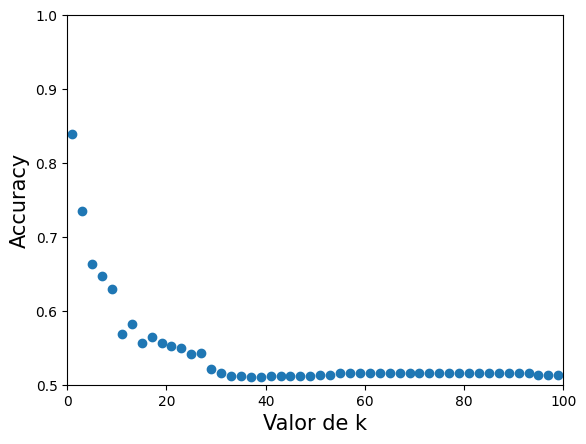

In [10]:
###### Regresión Logística ######

rl_model = LogisticRegression(max_iter=10000)
rl_model.fit(X_train, y_train)
best_value_lr = rl_model.score(X_test, y_test)


#### Multi-layer Perceptron #####

mlp_model = MLPClassifier(
    hidden_layer_sizes=[20, 40],
    activation='relu',
    early_stopping=True,
    random_state=13,
    max_iter=10000,
    solver='adam',
    verbose=False
)
mlp_model.fit(X_train, y_train)
best_value_mlp = mlp_model.score(X_test, y_test)


###### K Nearst Neighbors #######

vecinos =  []
for k in range(1, 101):
    model = KNeighborsClassifier(k)
    model.fit(X_train, y_train)
    vecinos.append((k, model.score(X_test, y_test)))

# Accuracy máximo obtenido
best_value_knn = max(vecinos, key=lambda x:x[1])[1]

########## Resultados ###########

print(f"K Nearst Neighbors - accuracy: {best_value_knn}")
print(f"Logistic Regression - accuracy: {best_value_lr}")
print(f"Multi-layer Perceptron - accuracy: {best_value_mlp}")

# Optimización de K

print('\nK optimization')
plt.scatter(*zip(*[i for i in vecinos if vecinos.index(i) % 2 == 0]))
plt.axis((0, 100, 0.5, 1))
plt.xlabel('Valor de k', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()

VER CORRELACIÓN

In [11]:
train_df_num = landmarks_train_df.copy()
mapeo = {'ALEX': 0, 'ENDIKA': 1}
train_df_num['Etiqueta'] = landmarks_train_df['Etiqueta'].map(mapeo)

corr = train_df_num.corr()['Etiqueta']

In [36]:
corr

0TO1        0.407948
0TO2        0.472305
0TO3        0.506371
0TO4        0.525722
0TO5        0.546311
              ...   
64TO67      0.187872
65TO66      0.227009
65TO67      0.292592
66TO67      0.341578
Etiqueta    1.000000
Name: Etiqueta, Length: 2279, dtype: float64

In [55]:
corr_df = pd.DataFrame(data=corr)
corr_df.reset_index(inplace=True)
corr_df = corr_df.rename({'index': 'Puntos', 'Etiqueta': 'Correlacion'}, axis=1)

corr_df

,Puntos,Correlacion
0,0TO1,0.407948
1,0TO2,0.472305
2,0TO3,0.506371
3,0TO4,0.525722
4,0TO5,0.546311
...,...,...
2274,64TO67,0.187872
2275,65TO66,0.227009
2276,65TO67,0.292592
2277,66TO67,0.341578


In [56]:
len(headers)

2279

In [53]:
headers_modelo = []
for i in range(0,len(corr_df)):
    if abs(corr_df['Correlacion'][i]) > 0.6 and corr_df['Puntos'][i]!='Etiqueta':
        headers_modelo.append(f"{corr_df['Puntos'][i]}")

print(headers_modelo)
len(headers_modelo)

['0TO10', '0TO11', '0TO12', '0TO13', '0TO14', '0TO15', '0TO16', '1TO6', '1TO7', '1TO8', '1TO9', '1TO10', '1TO11', '1TO12', '1TO13', '1TO14', '1TO15', '1TO16', '2TO5', '2TO6', '2TO7', '2TO8', '2TO9', '2TO10', '2TO11', '2TO12', '2TO13', '2TO14', '2TO15', '2TO16', '3TO5', '3TO6', '3TO7', '3TO8', '3TO9', '3TO10', '3TO11', '3TO12', '3TO13', '3TO14', '3TO15', '3TO16', '4TO5', '4TO6', '4TO7', '4TO10', '4TO11', '4TO12', '4TO13', '4TO14', '4TO15', '4TO16', '4TO26', '5TO6', '5TO10', '5TO11', '5TO12', '5TO13', '5TO14', '5TO15', '5TO26', '5TO36', '5TO39', '5TO40', '5TO41', '5TO42', '5TO43', '5TO44', '5TO45', '5TO46', '5TO47', '6TO17', '6TO18', '6TO19', '6TO21', '6TO24', '6TO25', '6TO26', '6TO27', '6TO36', '6TO37', '6TO38', '6TO39', '6TO40', '6TO41', '6TO42', '6TO43', '6TO44', '6TO45', '6TO46', '6TO47', '6TO48', '6TO60', '7TO17', '7TO18', '7TO19', '7TO20', '7TO21', '7TO27', '7TO28', '7TO31', '7TO32', '7TO34', '7TO35', '7TO36', '7TO37', '7TO38', '7TO39', '7TO40', '7TO41', '7TO42', '7TO43', '7TO44', 

216

# Foto con TODOS los puntos dibujados

In [94]:
keanu = cv2.imread('data/keanu_grande.jpg')

In [95]:
keanu_todos = keanu.copy()

p = "models/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

# Almacenar caras
data = []

# Preprocesar frame y obtener caras detectadas
# frame = imutils.resize(keanu, width=640)

gray = cv2.cvtColor(keanu_todos, cv2.COLOR_BGR2GRAY)

rects = detector(gray, 0)

for (i, rect) in enumerate(rects):

    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    for i in range(0,68):
        for j in range(i+1,68):
            
            # frame = cv2.line(frame,[, ],[],color=(255,0,0), thickness=1)
            start_point = (int(shape[i][0]), int(shape[i][1])) 

            end_point = (int(shape[j][0]),int(shape[j][1])) 
        
            color = (0, 255, 0) 
            keanu_todos = cv2.line(keanu_todos, start_point, end_point, color, 1)


# cv2.imshow(
cv2.imwrite('keanu_todos.jpg', keanu_todos)

True

# Foto con los puntos más importantes dibujados

In [96]:
keanu_importantes = keanu.copy()


for pts in headers_modelo:
    i, j = pts.split('TO')

   
    start_point = (shape[int(i)][0], shape[int(i)][1])

    end_point = (int(shape[int(j)][0]),int(shape[int(j)][1])) 

    color = (0, 255, 0) 
    keanu_importantes = cv2.line(keanu_importantes, start_point, end_point, color, 1) 


# cv2.imshow(
cv2.imwrite('keanu_importantes.jpg', keanu_importantes)

True